In [51]:
from module.roll import Roll
from module.biscuit import Biscuit
from module.genetic_algo import GeneticAlgorithm
import pandas as pd
from module.greedy_search import Greedy_Best_First_Search
import time
import matplotlib.pyplot as plt
from shapely import box

In [52]:
df_defect = pd.read_csv("./data/defects.csv")
df_defect['x'] = df_defect['x'].astype(int)

In [53]:
roll_greedy = Roll(df_defect)

In [54]:
b_0 = Biscuit(0,4,6,{'a' : 4, 'b': 2, 'c': 3})
b_1 = Biscuit(1,8,12,{'a' : 5, 'b': 4, 'c': 4})
b_2 = Biscuit(2,2,1,{'a' : 1, 'b': 2, 'c': 1})
b_3 = Biscuit(3,5,8,{'a' : 2, 'b': 3, 'c': 2})
list_biscuit = [b_3, b_0, b_1, b_2]

In [55]:
# Assuming 'biscuits' is a list of Biscuit objects, sorted by their value per unit length
start_greedy = time.time()
greedy_search = Greedy_Best_First_Search()
end_greedy = time.time()
roll_solution = greedy_search.search(roll_greedy, list_biscuit)
print("Maximum total value:", roll_solution.solution())

Maximum total value: 790


In [56]:
roll_genetic = Roll(df_defect)
start_ga = time.time()
ga = GeneticAlgorithm(roll_genetic, list_biscuit, population_size=50, generations=100, mutation_rate=0.01)
best_solution, max_value = ga.run()
end_ga = time.time()
print("Best solution:", best_solution)
print("Maximum value:", max_value)

Best solution: [(0, <module.biscuit.Biscuit object at 0x0000025139FE15B0>), (1, <module.biscuit.Biscuit object at 0x0000025139FE15B0>), (5, <module.biscuit.Biscuit object at 0x0000025139FE1130>), (9, <module.biscuit.Biscuit object at 0x0000025139FE16A0>), (17, <module.biscuit.Biscuit object at 0x0000025139FE15B0>), (18, None), (23, <module.biscuit.Biscuit object at 0x0000025139FE1130>), (28, <module.biscuit.Biscuit object at 0x0000025139FE12E0>), (36, None), (37, <module.biscuit.Biscuit object at 0x0000025139FE12E0>), (45, <module.biscuit.Biscuit object at 0x0000025139FE16A0>), (47, <module.biscuit.Biscuit object at 0x0000025139FE15B0>), (52, <module.biscuit.Biscuit object at 0x0000025139FE15B0>), (53, <module.biscuit.Biscuit object at 0x0000025139FE1130>), (58, <module.biscuit.Biscuit object at 0x0000025139FE15B0>), (63, <module.biscuit.Biscuit object at 0x0000025139FE1130>), (64, <module.biscuit.Biscuit object at 0x0000025139FE12E0>), (66, <module.biscuit.Biscuit object at 0x00000251

In [57]:
def create_polygon(start_x, start_y ,width, height):
    return box(start_x, start_y, start_x + width, height)

In [58]:
colors = ["red", "green", "blue", "yellow", "purple"]
def plot_polygons(list_polygons, algo):
    fig, ax = plt.subplots(figsize=(30, 6))  

    for type, polygon in list_polygons:
        color = colors[type + 1]

        x, y = polygon.exterior.xy
        ax.fill(x, y, alpha=0.5, color=color)  # Fill the exterior of the polygon with the specified color
        ax.plot(x, y, color=color) 

    ax.set_title(f"{algo} Roll and Biscuits Polygons")
    plt.show()

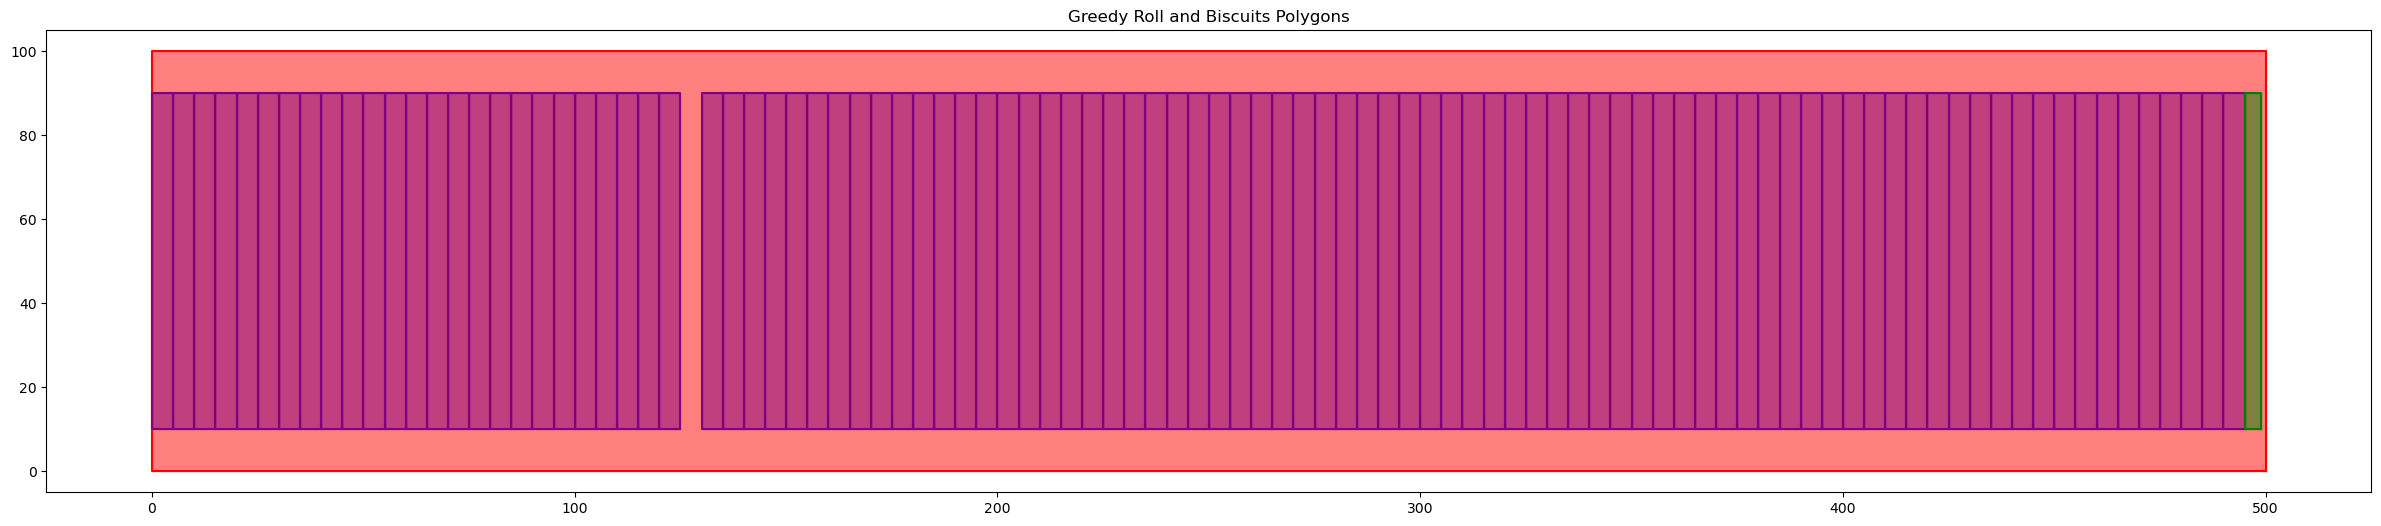

In [59]:
biscuit_height = 90

roll_polygon = create_polygon(0, 0, 500, 100)

list_polygon = [(-1, roll_polygon)]
current_x = 0
while current_x < len(roll_solution.roll):
    biscuit = roll_solution.roll[current_x]
    if biscuit["empty"] != -1:
        b = biscuit["empty"]
        biscuit_polygon = create_polygon(current_x, 10, b.length, biscuit_height)
        list_polygon.append((b.type, biscuit_polygon))
        current_x += b.length
    else :
        current_x += 1

plot_polygons(list_polygon, 'Greedy')

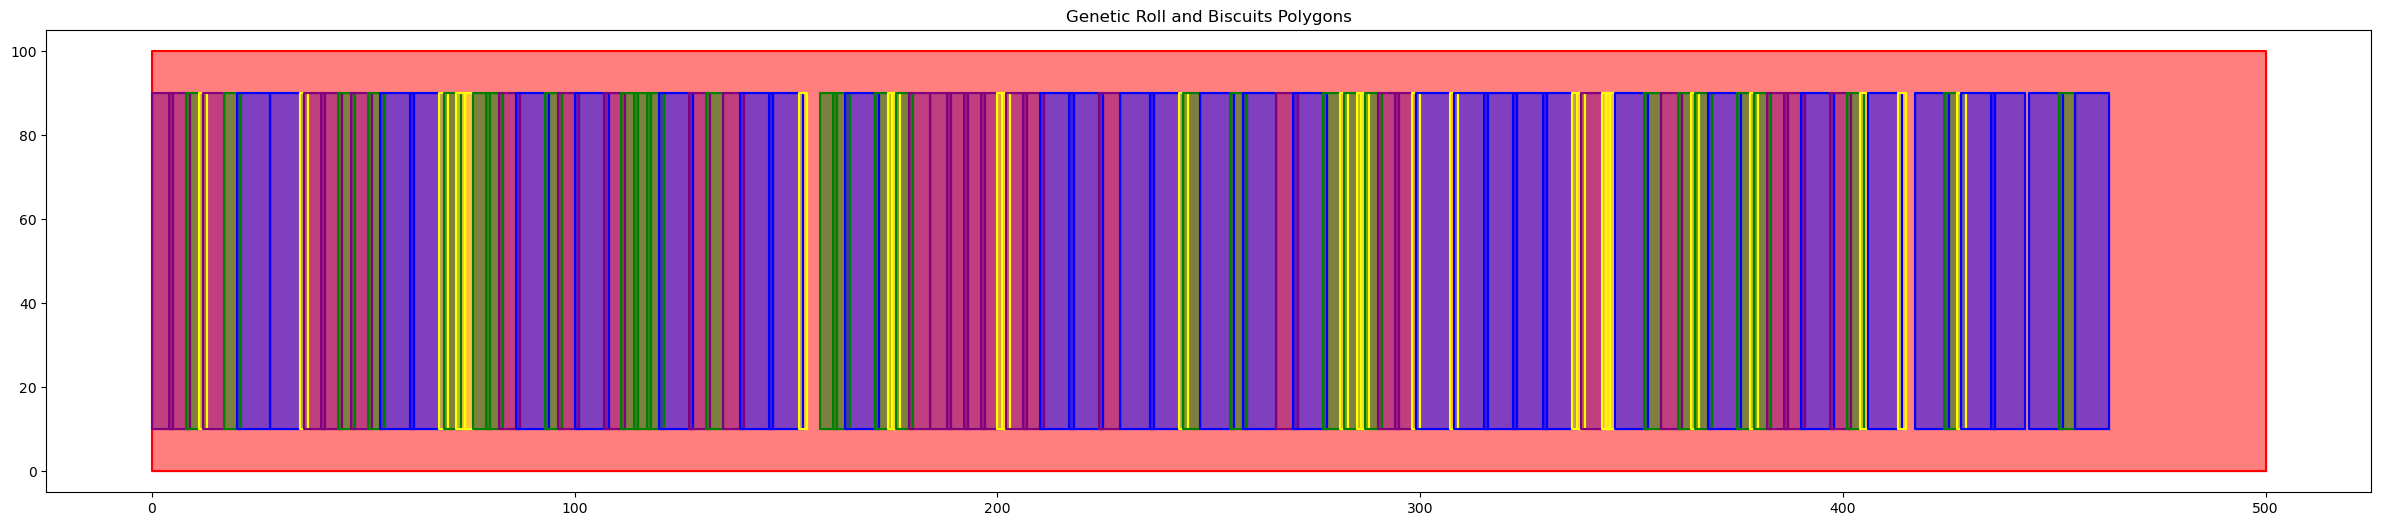

In [60]:
roll_polygon = create_polygon(0, 0, 500, 100)

list_polygon = [(-1, roll_polygon)]
current_x = 0
for _, biscuit in best_solution:
    if biscuit != None:
        biscuit_polygon = create_polygon(current_x, 10, biscuit.length, biscuit_height)
        list_polygon.append((biscuit.type, biscuit_polygon))
        current_x += biscuit.length - 1
    else :
        current_x += 1

plot_polygons(list_polygon, 'Genetic')

In [61]:
### Measure Greedy
nb_empty_greedy = len([x for x in roll_greedy.roll if x["empty"] == -1])
nb_b0_greedy = len([x for x in roll_greedy.roll if x["empty"] != -1 and x["empty"].type == 0])
nb_b1_greedy = len([x for x in roll_greedy.roll if x["empty"] != -1 and x["empty"].type == 1])
nb_b2_greedy = len([x for x in roll_greedy.roll if x["empty"] != -1 and x["empty"].type == 2])
nb_b3_greedy = len([x for x in roll_greedy.roll if x["empty"] != -1 and x["empty"].type == 3])

counts_greedy = {
    "Empty": nb_empty_greedy,
    "Biscuit 0": nb_b0_greedy / b_0.length,
    "Biscuit 1": nb_b1_greedy / b_1.length,
    "Biscuit 2": nb_b2_greedy / b_2.length,
    "Biscuit 3": nb_b3_greedy / b_3.length
} 

In [62]:
### Measure Genetic
nb_empty_gen = len([x for _,x in best_solution if x == None])
nb_b0_gen = len([x for _,x in best_solution if x != None and x.type == 0])
nb_b1_gen = len([x for _,x in best_solution if x != None and x.type == 1])
nb_b2_gen = len([x for _,x in best_solution if x != None and x.type == 2])
nb_b3_gen = len([x for _,x in best_solution if x != None and x.type == 3])
counts_gen = {
    "Empty": nb_empty_gen,
    "Biscuit 0": nb_b0_gen / b_0.length,
    "Biscuit 1": nb_b1_gen / b_1.length,
    "Biscuit 2": nb_b2_gen / b_2.length,
    "Biscuit 3": nb_b3_gen / b_3.length
} 

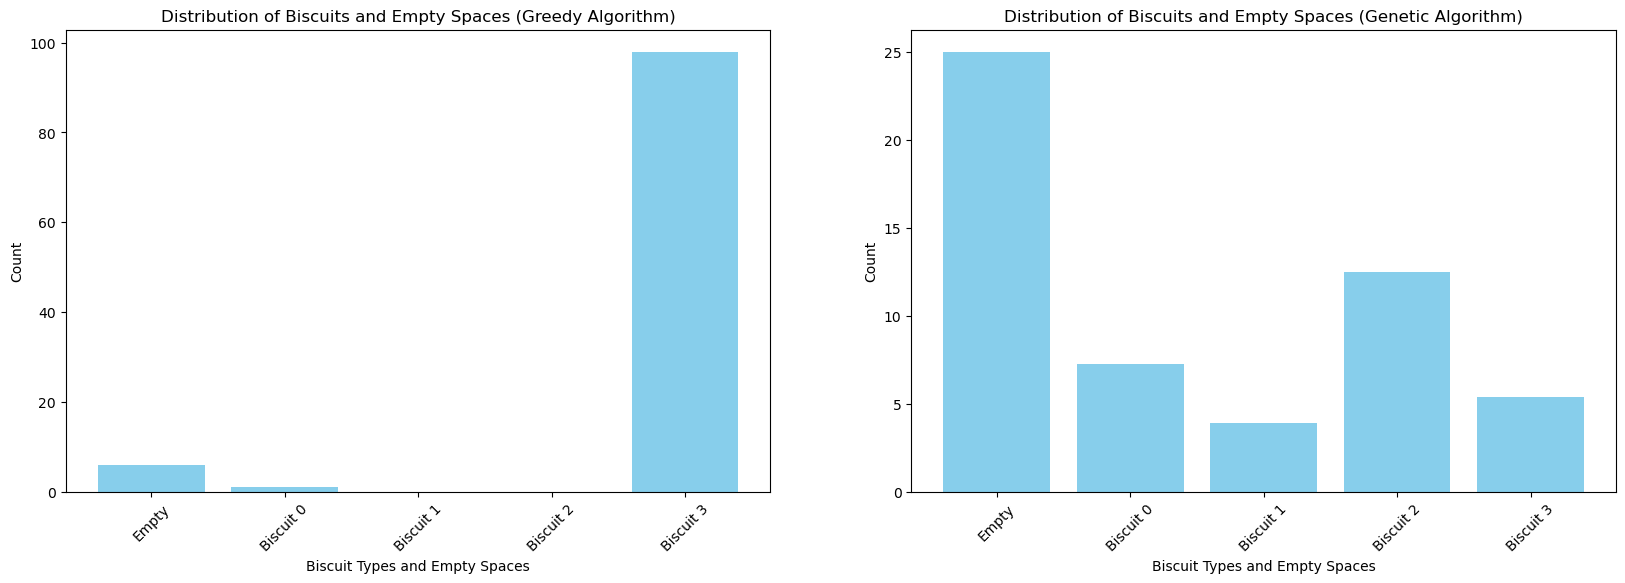

In [63]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.bar(counts_greedy.keys(), counts_greedy.values(), color='skyblue')
plt.xlabel('Biscuit Types and Empty Spaces')
plt.ylabel('Count')
plt.title('Distribution of Biscuits and Empty Spaces (Greedy Algorithm)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(counts_gen.keys(), counts_gen.values(), color='skyblue')
plt.xlabel('Biscuit Types and Empty Spaces')
plt.ylabel('Count')
plt.title('Distribution of Biscuits and Empty Spaces (Genetic Algorithm)')
plt.xticks(rotation=45)
plt.show()

In [64]:
time_diff = {
    "Greedy" : end_greedy - start_greedy,
    "Genetic" : end_ga - start_ga,
}
time_diff

{'Greedy': 0.0, 'Genetic': 2.2560477256774902}

In [65]:
roll_solution.solution(), max_value

(790, 252)

### Learning Experience

**Algorithmic Problem Solving:** This project was an excellent exercise in applying and comparing different algorithmic approaches - Greedy Best-First Search and Genetic Algorithm - to a practical problem. It demonstrated the importance of selecting appropriate algorithms based on the specific requirements and constraints of a problem.
<br><br>
**Practical Application of Theoretical Concepts:** Implementing these algorithms for a real-world scenario like biscuit manufacturing provided a tangible context to theoretical concepts like optimization, efficiency, and problem-solving strategies.
<br><br>
**Data Analysis and Visualization:** The project involved analyzing and visualizing data to compare the effectiveness of the algorithms. This aspect reinforced the importance of data visualization in conveying complex information succinctly and effectively.
<br><br>
**Python Programming and Libraries:** Through this project, you likely enhanced your Python programming skills, particularly in using libraries like Pandas for data manipulation, Matplotlib for visualization, and possibly others for algorithm implementation.

### Challenges and Solutions

**Algorithm Implementation:** Implementing and fine-tuning algorithms to suit the specific problem of optimizing biscuit placement would have been challenging. Understanding the nuances of each algorithm and adjusting parameters to get the best results would have required a deep dive into algorithmic thinking.
<br><br>
**Performance Comparison:** Another challenge would have been to objectively compare the performance of the two algorithms. This involves not just programming but also a statistical understanding of performance metrics. Addressing this challenge would have involved running multiple tests, collecting data, and using statistical methods to analyze the results.
<br><br>
**Efficiency Optimization:** Balancing efficiency and effectiveness in the algorithms, especially in the context of potentially large datasets (like a long roll of dough with many defects), was likely a significant challenge. You might have addressed this by refining your code, optimizing data structures, and possibly parallelizing computations.

### Insights and Noteworthy Aspects

**Algorithm Suitability:** An interesting insight would be how different algorithms perform under varying conditions. For instance, how a Greedy algorithm, which makes locally optimal choices, compares against a Genetic algorithm, which uses a more global, evolutionary approach.
<br><br>
**Real-World Application:** The project highlighted how theoretical computer science and algorithmic concepts have direct applications in real-world industrial scenarios, bridging the gap between academia and industry.
<br><br>
**Critical Thinking and Problem-Solving:** This project likely enhanced your ability to think critically about problems, analyze requirements, and creatively develop solutions.
<br><br>
**Performance Metrics Beyond Speed:** Often in computer science, speed is a primary metric. However, this project showed that other metrics, like total value optimization and resource usage, can be equally important.

In conclusion, this project seems to have been a comprehensive learning experience, covering aspects from algorithm selection and implementation to data analysis and real-world application, all while honing your problem-solving and programming skills in Python.